In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./Datasets/Call_Center_1999_DataSet.csv', delimiter=';')
df.head(5)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0


In [4]:
df.columns

Index(['vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server', 'startdate'],
      dtype='object')

In [5]:
# Cantidad de registros y columnas
df.shape

(444448, 18)

In [6]:
# Tipo de dato y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

In [7]:
# Transformación de los tipo de datos
df['vru.line']  =df['vru.line'].astype('str')
df['call_id']   =df['call_id'].astype('str')
df['priority']  =df['priority'].astype('category')
df['type']      =df['type'].astype('category')
df['date']      =pd.to_datetime(df['date'])
df['vru_entry'] =pd.to_datetime(df['vru_entry'])
df['vru_exit']  =pd.to_datetime(df['vru_exit'])
df['q_start']   =pd.to_datetime(df['q_start'])
df['q_exit']    =pd.to_datetime(df['q_exit'])
df['outcome']   =df['outcome'].astype('category')
df['ser_start'] =pd.to_datetime(df['ser_start'])
df['ser_exit']  =pd.to_datetime(df['ser_exit'])
df['vru_entry'] =pd.to_datetime(df['vru_entry'])
df['server']    =df['server'].astype('category')

In [8]:
# Confirmación del cambio del tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   vru.line     444448 non-null  object        
 1   call_id      444448 non-null  object        
 2   customer_id  444448 non-null  object        
 3   priority     444448 non-null  category      
 4   type         444448 non-null  category      
 5   date         444448 non-null  datetime64[ns]
 6   vru_entry    444448 non-null  datetime64[ns]
 7   vru_exit     444448 non-null  datetime64[ns]
 8   vru_time     444448 non-null  int64         
 9   q_start      444448 non-null  datetime64[ns]
 10  q_exit       444448 non-null  datetime64[ns]
 11  q_time       444448 non-null  int64         
 12  outcome      444448 non-null  category      
 13  ser_start    444448 non-null  datetime64[ns]
 14  ser_exit     444448 non-null  datetime64[ns]
 15  ser_time     444448 non-null  int6

In [11]:
df['date'] = pd.to_numeric(df['date'])
df.describe()

,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,ser_start,ser_exit,ser_time,startdate
count,4.444480e+05,444448,444448,444448.000000,444448,444448,444448.000000,444448,444448,444448.000000,444448.000000
mean,9.312549e+17,2024-08-16 14:27:15.241546240,2024-08-16 14:27:25.527627520,10.286081,2024-08-16 08:29:01.435895552,2024-08-16 08:29:48.776293120,59.004304,2024-08-16 11:43:11.602028288,2024-08-16 11:44:47.382784,152.561776,172.333974
min,9.151488e+17,2024-08-16 00:00:01,2024-08-16 00:00:08,-362.000000,2024-08-16 00:00:00,2024-08-16 00:00:00,0.000000,2024-08-16 00:00:00,2024-08-16 00:00:00,0.000000,0.000000
25%,9.237888e+17,2024-08-16 10:45:42,2024-08-16 10:45:51,6.000000,2024-08-16 00:00:00,2024-08-16 00:00:00,0.000000,2024-08-16 08:37:01,2024-08-16 08:38:59,12.000000,90.000000
50%,9.312192e+17,2024-08-16 14:03:55,2024-08-16 14:04:06,8.000000,2024-08-16 10:01:48,2024-08-16 10:03:29,16.000000,2024-08-16 12:23:49,2024-08-16 12:26:31,84.000000,181.000000
75%,9.392544e+17,2024-08-16 17:43:51,2024-08-16 17:44:01,10.000000,2024-08-16 14:57:19.249999872,2024-08-16 14:59:05,79.000000,2024-08-16 16:50:35,2024-08-16 16:52:39.249999872,185.000000,273.000000
max,9.465984e+17,2024-08-16 23:59:58,2024-08-16 23:59:59,4832.000000,2024-08-16 23:59:59,2024-08-16 23:59:59,28693.000000,2024-08-16 23:59:58,2024-08-16 23:59:59,61437.000000,334.000000
std,9.076882e+15,NaN,NaN,34.942136,NaN,NaN,119.470328,NaN,NaN,282.372761,104.559247


In [14]:
# Resumen estadístico del estado actual de las variables categóricas
df.describe(include=['category', 'object'])

,vru.line,call_id,customer_id,priority,type,outcome,server
count,444448,444448,444448.0,444448,444448,444448,444448
unique,30,54471,19048.0,3,8,3,53
top,AA0209,35186,0.0,0,PS,AGENT,NO_SERVER
freq,21423,16,178572.0,235168,302522,353143,96511


En esta primera exploración se puede concluir lo siguiente:

* Hay 444.448 registros
* 12 variables
* No hay valores nulos
* La mayoría de los datos se cargaron como objeto pero se realizó la conversión correspondiente.
* Las llamadas registradas se encuentran a lo largo del año 1999.
* Las variables vru_time, q_time y ser_time deben revisarse porque sus valores máximos son muy altos.
* La variable vru_time tiene un valor mínimo negativo que se deberá revisar.
* Se contabilizan 30 líneas, siendo la vru_line AA0209 la que mas llamadas registra.
* La variable call_id deberá revisarse porque presenta valores repetidos para ser id. Esto se debe a que el id es por cada vru, por lo que se sugiere incorporar una variable compuesta por el vru y el id para generar un id_unico.
* Se registró el llamado de 19048 clientes, de los cuales el cliente 0 tuvo la mayor frecuencia. Este cliente 0 significa que el cliente no fue identificado como por ejemplo en el caso de los prospectos.
* Hay 3 ategorías de prioridad (priority), siendo a priodidad con mayor frecuencia de atención la 0 que corresponde a clientes no identificados o clientes regulares.
* Hay 8 tipos de servicios (type), siendo PS el servicio mas solicitado, que corresponde a una actividad regular.
* Hay 3 posibles salidas de la llamada (outcome), siendo AGENT la mas frecuente, que significa que se dio servicio al cliente.
* Hay 53 nombres de clientes (server) registrados en las llamadas, aunque uno de ellos pertenece a NO_SERVER que significa que no el servicio no fue provisto. Este es el nombre con mayor frecuencia registrada.
* Hay una variable, startdate, de la cual no se dispone información, por lo que se borrará.

In [15]:
# Creación de id único por llamada
df['id_unique'] = df['vru.line'] + ' ' + df['call_id']

In [16]:
# Eliminación de startdate
df = df.drop('startdate', axis=1)

In [17]:
# Se agrega una nueva columna para el mes
df['month'] = df['date'].dt.month
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [18]:
#Se verifica un solo año
df['date'].dt.year.unique()

array([1999], dtype=int32)

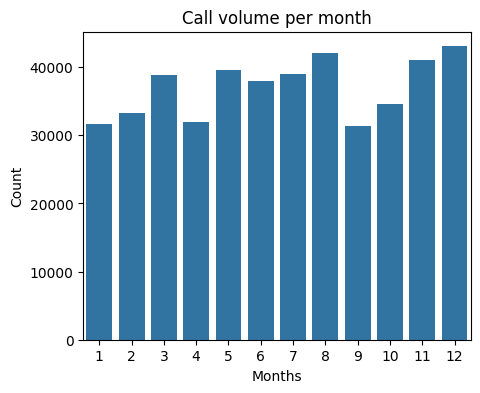

In [19]:
# Se grafica el volumne de llamadas por mes
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='month')

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Call volume per month')
plt.show()

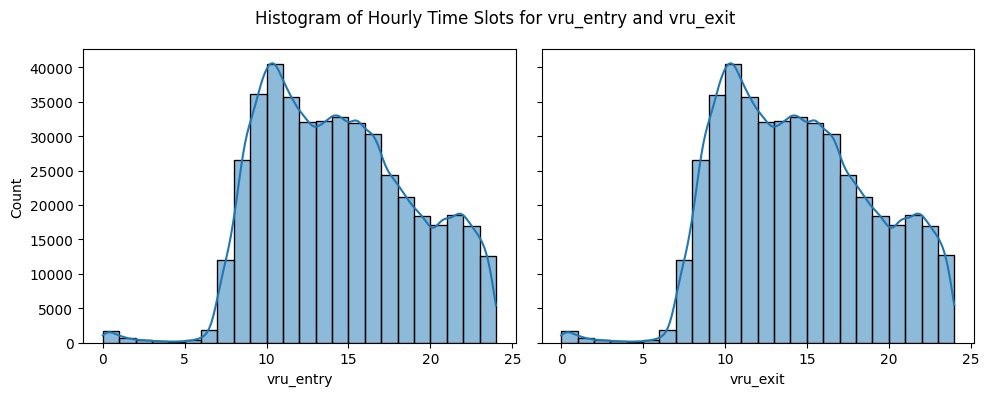

In [20]:
# Se observan la frecuencia de llamadas por horas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.histplot(data=df, x=(df['vru_entry'] - df['vru_entry'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax1)
sns.histplot(data=df, x=(df['vru_exit'] - df['vru_exit'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax2)

ax1.set_xlabel('vru_entry') ; ax1.set_ylabel('Count')
ax2.set_xlabel('vru_exit')
plt.suptitle('Histogram of Hourly Time Slots for vru_entry and vru_exit')
plt.tight_layout()
plt.show()

In [21]:
df['vru_time'].describe()

count    444448.000000
mean         10.286081
std          34.942136
min        -362.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time, dtype: float64

In [22]:
# Se cuentan los valores negativos
neg_count = (df['vru_time'] < 0).sum()
perc_neg = round(neg_count/df['vru_time'].count()*100, 2)
print('Cantidad de valores negativos: ', neg_count)
print('Porcentaje sobre el total:', perc_neg, '%')

Cantidad de valores negativos:  350
Porcentaje sobre el total: 0.08 %


In [23]:
df['vru_entry_corr'] = np.where(df['vru_entry'] > df['vru_exit'], df['vru_exit'], df['vru_entry'])
df['vru_exit_corr'] = np.where(df['vru_entry'] > df['vru_exit'], df['vru_entry'], df['vru_exit'])

In [24]:
df['vru_time_corr'] = (df['vru_exit_corr'] - df['vru_entry_corr']).dt.total_seconds()
df['vru_time_corr'] = df['vru_time_corr'].astype('int64')

In [25]:
# Se verifican los cambios
df['vru_time_corr'].describe()

count    444448.000000
mean         10.396357
std          34.909485
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time_corr, dtype: float64

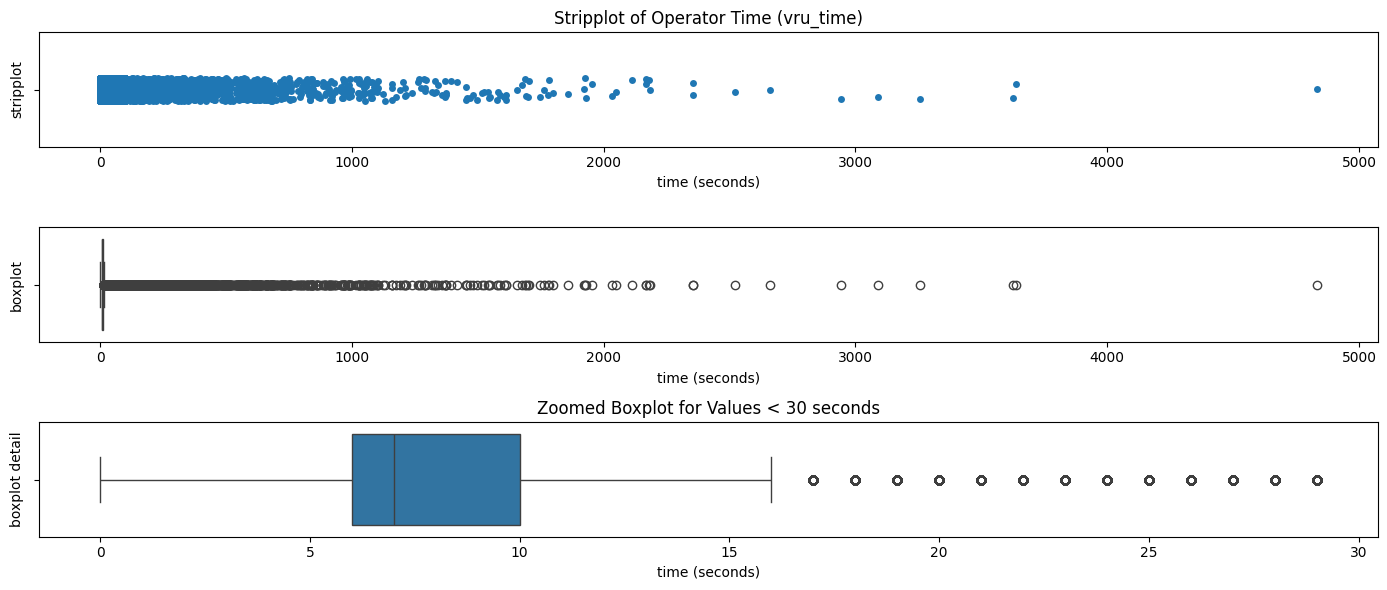

In [26]:
# Se grafican la dispersion de las llamadas y un boxplot a la misma escala que el stripplot y detalle
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='vru_time_corr', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of Operator Time (vru_time)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='vru_time_corr', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['vru_time_corr'] < 30], x='vru_time_corr', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

In [27]:
outlier_count = (df['vru_time_corr'] > 16).sum()
perc_outlier = round(outlier_count/df['vru_time_corr'].count()*100,2)
print('Cantidad de valores outlier sobre 16 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 16 segundos:  26654
Porcentaje sobre el total: 6.0 %
